In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.io import read_file
from matplotlib import image
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization, Lambda
from keras.regularizers import l2
import numpy as np
import pandas as pd
import time
from tensorflow.image import resize
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
seed = 10
np.random.seed(seed)
tf.random.set_seed(seed)
from tensorflow.keras.callbacks import Callback
from keras.preprocessing.image import load_img
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from pprint import pprint

In [2]:
learning_rate = 0.001
def step_decay(epoch):
    init_lrate = learning_rate #TOCHANGE
    drop = 0.1
    epochs_drop = 10000
    lrate = init_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate
sgd = keras.optimizers.SGD(learning_rate,momentum=0.0) #TOCHANGE
weight_init = keras.initializers.TruncatedNormal(mean=0.0,stddev=0.01,seed=10)
loss_func = keras.losses.BinaryCrossentropy()
lrate = keras.callbacks.LearningRateScheduler(step_decay)


In [3]:
age_model = keras.models.Sequential([
    Conv2D(96, (7,7), input_shape=(256,256,3), strides=4, padding='valid', activation='relu', kernel_initializer = weight_init),
    MaxPooling2D(pool_size = (3, 3), strides = 2, padding='same'),
    Lambda(lambda x: tf.nn.local_response_normalization(input=x, alpha=0.0001, beta=0.75)),

    Conv2D(256, (5,5), padding='same', activation = 'relu', kernel_initializer = weight_init),
    MaxPooling2D(pool_size = (3, 3), strides = 2, padding = 'same'),
    Lambda(lambda x: tf.nn.local_response_normalization(input=x, alpha=0.0001, beta=0.75)),

    Conv2D(384,(3,3), padding='same', activation='relu', kernel_initializer = weight_init),
    MaxPooling2D(pool_size=(3,3), strides = 2, padding='same'),
    Flatten(),

    Dense(512, activation = "relu", kernel_initializer = weight_init),
    Dropout(0.5),

    Dense(8, activation ='softmax', kernel_initializer = weight_init)
])

age_model.compile(loss = loss_func, optimizer = sgd, metrics=['accuracy'])

In [5]:
!unzip "/content/best_model_age_4_0.005_512_1.tf" -d "/content/best_model_age/"

Archive:  /content/best_model_age_4_0.005_512_1.tf.zip
   creating: /content/best_model_age/best_model_age_4_0.005_512_1.tf/
  inflating: /content/best_model_age/__MACOSX/._best_model_age_4_0.005_512_1.tf  
  inflating: /content/best_model_age/best_model_age_4_0.005_512_1.tf/keras_metadata.pb  
   creating: /content/best_model_age/best_model_age_4_0.005_512_1.tf/variables/
  inflating: /content/best_model_age/__MACOSX/best_model_age_4_0.005_512_1.tf/._variables  
  inflating: /content/best_model_age/best_model_age_4_0.005_512_1.tf/saved_model.pb  
   creating: /content/best_model_age/best_model_age_4_0.005_512_1.tf/assets/
  inflating: /content/best_model_age/__MACOSX/best_model_age_4_0.005_512_1.tf/._assets  
  inflating: /content/best_model_age/best_model_age_4_0.005_512_1.tf/variables/variables.data-00000-of-00001  
  inflating: /content/best_model_age/best_model_age_4_0.005_512_1.tf/variables/variables.index  


In [24]:
image1 = Image.open('/content/trial1.png')

image1=image1.resize((256, 256))

data = asarray(image1)
for j in data:
    j=j/255
y=[7] #female
a=[data]
a=np.asarray(a)
y = np.asarray(y)
age_model.load_weights('/content/best_model_age/best_model_age_4_0.005_512_1.tf')
pred = age_model.predict(a)
print(pred)
result = np.where(pred == np.amax(pred))
a = result[1]
scores = age_model.evaluate(a, y, verbose=1)

[[0.04752614 0.136161   0.00380761 0.09161869 0.3597891  0.26464316
  0.0481567  0.04829764]]


ValueError: ignored

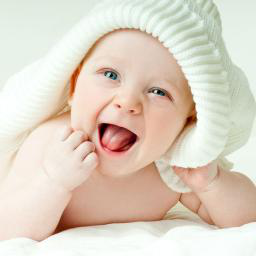

In [12]:
image1

In [ ]:
image2 = Image.open('/content/trial2.png')

image2=image2.resize((256, 256))

data = asarray(image2)
for j in data:
    j=j/255
y=[0] #male
a=[data]
a=np.asarray(a)
y = np.asarray(y)
age_model.load_weights('/content/best_model_gender/best_model_gender_16_0.001_512_1.tf')
scores = age_model.evaluate(a, y, verbose=1)

1/1 [==============================] - 0s 61ms/step - loss: 0.0547 - accuracy: 1.0000


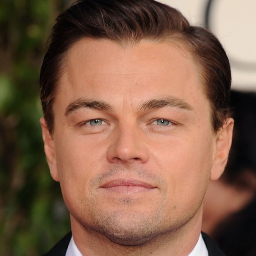

In [ ]:
image2

In [ ]:
image3 = Image.open('/content/trial3.png')

image3=image3.resize((256, 256))

data = asarray(image3)
for j in data:
    j=j/255
y=[0] #male
a=[data]
a=np.asarray(a)
y = np.asarray(y)
age_model.load_weights('/content/best_model_gender/best_model_gender_16_0.001_512_1.tf')
scores = age_model.evaluate(a, y, verbose=1)